# Text Classification - LSTM

**Raynold Panji Zulfiandi**

> Dataset : https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text

## Download Datasets

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raynoldpanji","key":"fdfe72c4650d0603c8c50ad8ea6c433d"}'}

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
# test kaggle dataset list
!kaggle datasets list 

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          10826        325  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           3002         82  1.0              
harshsingh2209/tesla-stock-pricing-20172022                    TESLA stock pricing (2017-2022)                      28KB  2022-09-18 14:56:29            516         23  1.0              
thedevastator/airplane-crashes-and-fatalities                  Ai

In [5]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d pashupatigupta/emotion-detection-from-text

  0% 0.00/1.56M [00:00<?, ?B/s]
100% 1.56M/1.56M [00:00<00:00, 127MB/s]


In [6]:
# !mkdir dataset
!unzip emotion-detection-from-text.zip -d dataset
!ls dataset

Archive:  emotion-detection-from-text.zip
  inflating: dataset/tweet_emotions.csv  
tweet_emotions.csv


## Load Dataset

In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("dataset/tweet_emotions.csv")
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


## Data Preprocessing

In [9]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [10]:
df2 = df[df['sentiment'].isin(['surprise', 'happiness', 'sadness'])]
df2['sentiment'].value_counts()

happiness    5209
sadness      5165
surprise     2187
Name: sentiment, dtype: int64

In [11]:
import matplotlib.pyplot as plt

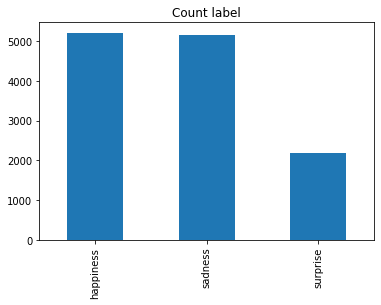

In [12]:
label_count = df2['sentiment'].value_counts()
label_count.plot(kind='bar', title='Count label')
plt.show()

In [13]:
## Over sampling data

df_sample1 = df2[df2['sentiment'] == 'happiness']
df_sample2 = df2[df2['sentiment'] == 'sadness'].sample(label_count[0], replace=True)
df_sample3 = df2[df2['sentiment'] == 'surprise'].sample(label_count[0], replace=True)

Random Over Sampling
happiness    5209
sadness      5209
surprise     5209
Name: sentiment, dtype: int64


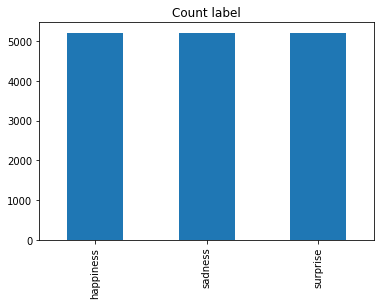

In [14]:
df_over = pd.concat([
    df_sample1,
    df_sample2,
    df_sample3
],axis=0)

print('Random Over Sampling')
print(df_over['sentiment'].value_counts())
df_over['sentiment'].value_counts().plot(kind='bar', title='Count label')
plt.show()

In [15]:
df_over

,tweet_id,sentiment,content
40,1956977084,happiness,mmm much better day... so far! it's still quit...
69,1956983874,happiness,So great to see Oin &amp; Cynthia. So happy. ...
77,1956985535,happiness,"@havingmysay dude, that is my favorite sandwi..."
126,1956996765,happiness,Need to pack for CALI CALI! Cannot waittt! Thi...
233,1957017522,happiness,took a math test today. The day before the tes...
...,...,...,...
37042,1753417555,surprise,I am in a middle of a industrial estate in pir...
22516,1694439274,surprise,@capn_mactastic I dunno ;p How'd I end up waki...
21664,1694275382,surprise,"@wonko42 and staff rooms, It will be interstin..."
27406,1695767386,surprise,@KimPossible40 If you're living under a bridge...


In [16]:
## cek jika data yang null
df_over.isnull().sum() 

tweet_id     0
sentiment    0
content      0
dtype: int64

In [17]:
# delete colom yang tidak digunakan
df_new = df_over.drop(columns=['tweet_id'])
df_new

,sentiment,content
40,happiness,mmm much better day... so far! it's still quit...
69,happiness,So great to see Oin &amp; Cynthia. So happy. ...
77,happiness,"@havingmysay dude, that is my favorite sandwi..."
126,happiness,Need to pack for CALI CALI! Cannot waittt! Thi...
233,happiness,took a math test today. The day before the tes...
...,...,...
37042,surprise,I am in a middle of a industrial estate in pir...
22516,surprise,@capn_mactastic I dunno ;p How'd I end up waki...
21664,surprise,"@wonko42 and staff rooms, It will be interstin..."
27406,surprise,@KimPossible40 If you're living under a bridge...


In [18]:
# One-hot encoding

sentiment = pd.get_dummies(df_new.sentiment)
df_new = pd.concat([df_new, sentiment], axis=1)
df_new = df_new.drop(columns='sentiment')
df_new = df_new.reset_index(drop=True)    ## reset index
df_new

,content,happiness,sadness,surprise
0,mmm much better day... so far! it's still quit...,1,0,0
1,So great to see Oin &amp; Cynthia. So happy. ...,1,0,0
2,"@havingmysay dude, that is my favorite sandwi...",1,0,0
3,Need to pack for CALI CALI! Cannot waittt! Thi...,1,0,0
4,took a math test today. The day before the tes...,1,0,0
...,...,...,...,...
15622,I am in a middle of a industrial estate in pir...,0,0,1
15623,@capn_mactastic I dunno ;p How'd I end up waki...,0,0,1
15624,"@wonko42 and staff rooms, It will be interstin...",0,0,1
15625,@KimPossible40 If you're living under a bridge...,0,0,1


In [19]:
label_list = df_new.columns[1:].tolist()
label_list

['happiness', 'sadness', 'surprise']

In [20]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
## Menghilangkan stopwords

from nltk.corpus import stopwords
import re
STOPWORDS = set(stopwords.words('english'))
sentences = df_new['content']

for i, sent in enumerate(sentences):
  print(f"\n|  ===> {sentences[i]}")
  for word in STOPWORDS:
      token = ' ' + word + ' '
      sent = sent.replace(token, ' ')
      sentences[i] = sent.replace(' ', ' ')  ## remove stopwords
  print(f"\n|  ===> {sentences[i]}")
  sentences[i] = re.sub(r'[@#$&][0-9A-Za-z]*', '', sentences[i])  ## replace tag
  print(f"\n|  ===> {sentences[i]}")
  print(f"\n========== Stopwords pada content ke-{i} selesai ✓✓✓ ==========\n")

Streaming output truncated to the last 5000 lines.

|  ===>  took Terminator trilogy :-D I need actually TV series I still can't find anything tempting

========== Stopwords pada content ke-15071 selesai ✓✓✓ ==========


|  ===> @theellenshow Please bring @kalebnation to your show

|  ===> @theellenshow Please bring @kalebnation show

|  ===>  Please bring  show

========== Stopwords pada content ke-15072 selesai ✓✓✓ ==========


|  ===> Wow - the dude said I was better than Bobbi Lewis.. never heard the guy - but I take that as a compliment  (just read the BL web site)

|  ===> Wow - dude said I better Bobbi Lewis.. never heard guy - I take compliment  (just read BL web site)

|  ===> Wow - dude said I better Bobbi Lewis.. never heard guy - I take compliment  (just read BL web site)

========== Stopwords pada content ke-15073 selesai ✓✓✓ ==========


|  ===> omg seated for seth lakeman but way too far back for my liking  x

|  ===> omg seated seth lakeman way far back liking  x

|  ==

In [22]:
sentences[0]

'mmm much better day... far! still quite early. last day '

In [23]:
## ubah text jadi lower-case
df_new['content'] = sentences.apply(lambda x: x.lower())
df_new['content']

0        mmm much better day... far! still quite early....
1        so great see oin ; cynthia.  so happy.  dinner...
2          dude, favorite sandwich place ever. ummm tak...
3        need pack cali cali! cannot waittt! thinking g...
4        took math test today. the day test, teacher sa...
                               ...                        
15622    i middle industrial estate pirate ffancy dress...
15623    _mactastic i dunno ;p how'd i end waking 2 am?...
15624     staff rooms, it intersting see k12 faces ever...
15625     if living bridge need goats! if gets bad come...
15626     oh thas cool  know, i kinda knew bouts cuz er...
Name: content, Length: 15627, dtype: object

In [24]:
# Splitting data kalimat dan label menjadi X dan y
X = df_new['content'].values
y = df_new.drop(columns='content').values

In [25]:
# Split data menjadi train dan test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [26]:
## Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=3000, oov_token='<oov>', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{"}~\t\n')
tokenizer.fit_on_texts(X_train) 
# tokenizer.fit_on_texts(X_test)

X_seq_train = tokenizer.texts_to_sequences(X_train)
X_seq_test = tokenizer.texts_to_sequences(X_test)

max([len(x) for x in X_seq_train])

28

In [27]:
## Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_pad_train = pad_sequences(X_seq_train) 
X_pad_test = pad_sequences(X_seq_test) 

## Training Model

In [28]:
num_class = len(label_list)
num_class

3

In [29]:
## Buat model arsitektur neural network

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=3000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(254, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          48000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 254)               32766     
                                                                 
 dropout_1 (Dropout)         (None, 254)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 7

In [30]:
## compile model

opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss = "categorical_crossentropy", optimizer=opt_adam, metrics=['accuracy'])

In [31]:
## membuat callbacks earlystop 
from timeit import default_timer as timer

EarlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              patience=10, mode='auto')

class myCallback(tf.keras.callbacks.Callback):
  def __init__(self, logs={}):
      self.time=[]
  def on_epoch_begin(self, epoch, logs={}):
      self.starttime = timer()
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy") >= 0.95 and logs.get("val_accuracy") >= 0.95):
      print("accuracy melebihi!")
      self.time.append(timer()-self.starttime)
      self.model.stop_training = True
    self.time.append(timer()-self.starttime)

callbacks = [EarlyStop, myCallback()]

In [32]:
## Train model

num_epochs = 60
history = model.fit(
    X_pad_train, y_train, 
    epochs=num_epochs, 
    validation_data=(X_pad_test, y_test), 
    verbose=1,
    batch_size=128,
    callbacks=[callbacks]
)
print(f"\n====== waktu training: {sum(callbacks[1].time)/60} menit ======")

Epoch 1/60
98/98 [==============================] - 8s 11ms/step - loss: 1.0381 - accuracy: 0.4480 - val_loss: 0.9322 - val_accuracy: 0.5720
Epoch 2/60
98/98 [==============================] - 1s 7ms/step - loss: 0.7804 - accuracy: 0.6687 - val_loss: 0.8105 - val_accuracy: 0.6548
Epoch 3/60
98/98 [==============================] - 1s 6ms/step - loss: 0.6300 - accuracy: 0.7607 - val_loss: 0.7673 - val_accuracy: 0.6929
Epoch 4/60
98/98 [==============================] - 1s 6ms/step - loss: 0.5469 - accuracy: 0.7983 - val_loss: 0.7761 - val_accuracy: 0.7003
Epoch 5/60
98/98 [==============================] - 1s 7ms/step - loss: 0.4996 - accuracy: 0.8176 - val_loss: 0.8144 - val_accuracy: 0.7015
Epoch 6/60
98/98 [==============================] - 1s 7ms/step - loss: 0.4575 - accuracy: 0.8367 - val_loss: 0.8042 - val_accuracy: 0.7028
Epoch 7/60
98/98 [==============================] - 1s 6ms/step - loss: 0.4229 - accuracy: 0.8515 - val_loss: 0.8318 - val_accuracy: 0.7131
Epoch 8/60
98/98 [=

In [33]:
## evaluasi model
model.evaluate(X_pad_test, y_test)

98/98 [==============================] - 0s 3ms/step - loss: 1.1269 - accuracy: 0.7444


[1.1268984079360962, 0.7444018125534058]

## Plot loss dan akurasi

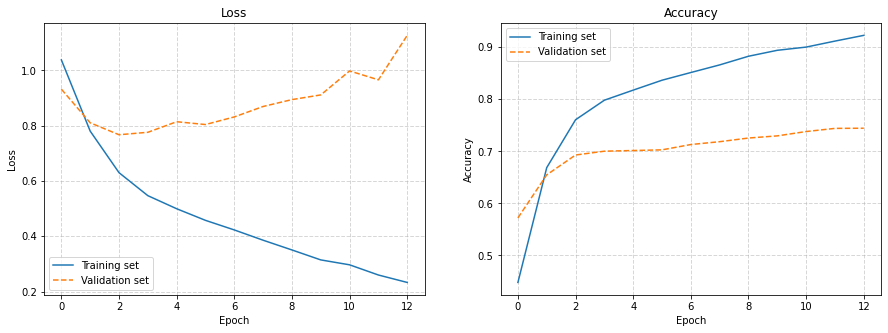

In [34]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(acc, label='Training set')
plt.plot(val_acc, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()

## Plot Confusing Matrix

In [35]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
predictions = model.predict(X_pad_test)
prediction_labels = np.argmax(predictions, axis=1)
predictions[:5], prediction_labels[:5]

(array([[2.9614113e-05, 2.3852523e-05, 9.9994648e-01],
        [2.5871862e-04, 1.9495111e-03, 9.9779177e-01],
        [9.3390226e-01, 3.7893839e-02, 2.8203839e-02],
        [1.7401489e-03, 3.5061658e-04, 9.9790925e-01],
        [3.4998875e-04, 1.5398902e-03, 9.9811018e-01]], dtype=float32),
 array([2, 2, 0, 2, 2]))

In [37]:
labels_test = np.argmax(y_test, axis=1)
labels_test[:5]

array([2, 2, 0, 2, 0])

In [38]:
print("================== Classification Report =====================")
print(classification_report(labels_test, prediction_labels, target_names=label_list))
print("===============================================================")
print("==================== Confusing Matrix ========================")
pd.DataFrame(confusion_matrix(labels_test, prediction_labels), index=label_list, columns=label_list)

================== Classification Report =====================
              precision    recall  f1-score   support

   happiness       0.71      0.66      0.69      1048
     sadness       0.76      0.77      0.77      1049
    surprise       0.75      0.81      0.78      1029

    accuracy                           0.74      3126
   macro avg       0.74      0.74      0.74      3126
weighted avg       0.74      0.74      0.74      3126

==================== Confusing Matrix ========================


,happiness,sadness,surprise
happiness,692,188,168
sadness,140,806,103
surprise,139,61,829
